In [1]:
import pandas as pd

#### To read the csv file :

In [2]:
df = pd.read_csv(r"D:\ice_cream_data.csv")

#### To show the first 5 rows from our dataset : 

In [3]:
df.head()

,Temperature,ice cream sales
0,-4.903246,9
1,39.713516,83
2,2.968556,25
3,8.934454,34
4,6.548480,28


#### Now we need to separate the features from the labels :

In [4]:
X = df[["Temperature"]]
y = df["ice cream sales"]

#### To split our data into training set and testing set we can use :

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#### To create the linear regression model (which is an object) : (our black box that is no longer a black box)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

#### To train the model using training set :

In [9]:
model.fit(X_train, y_train)

LinearRegression()

#### To compute the R² score

In [10]:
model.score(X_test, y_test)

0.9860396794676625

#### To compute the MSE :

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y_predicted = model.predict(X_test)
mean_squared_error(y_test, y_predicted)

4.268327517832663

In [13]:
#in this case .score method computes the R2 score
r2_score(y_predicted, y_test)

0.9860349485370841

#### To show the parameters (slope and intercept) :

In [14]:
model.coef_

array([1.613331])

In [15]:
model.intercept_

18.05194258681427

#### OLS from scratch :

In [16]:
def mean(x):
    return sum(x.values)/len(x)

def train(x, y):
    numer = 0
    denom = 0
    for i in range(len(x)):
        numer += (x.values[i] - mean(x)) * (y.values[i] - mean(y))
        denom += (x.values[i] - mean(x)) ** 2
        
    a = numer / denom
    b = mean(y) - (a * mean(x))
    return (a, b)

In [17]:
a, b = train(X_train, y_train)

In [18]:
a

array([1.613331])

In [19]:
b

array([18.05194259])

#### To plot our best fit line :

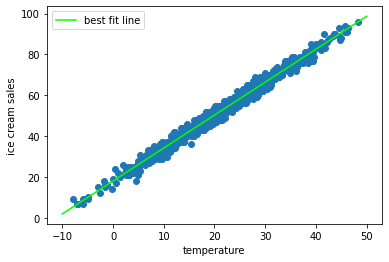

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.linspace(-10, 50, 100)
y_axis = (a * x_axis) + b
plt.scatter(X_train, y_train)
plt.plot(x_axis, y_axis, color="#00ff00", label="best fit line")
plt.xlabel("temperature")
plt.ylabel("ice cream sales")
plt.legend()